In [23]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from math import sqrt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from scipy import sparse
from scipy.stats import uniform, randint
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder  
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB

import  lightgbm as lgbm 
import xgboost as xgb 
import catboost as cat 

In [24]:
#load data
df = pd.read_csv("customer_churn.csv")

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
#summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [27]:
#get columns
df.columns.tolist() 

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [28]:
#check for missing data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
#drop Total Charges
df = df.drop(['TotalCharges'],axis=1)

In [30]:
#drop customer id
df = df.drop(['customerID'],axis=1)

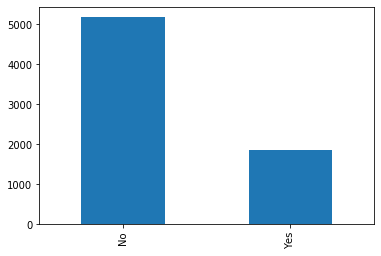

In [31]:
#check for target ratio
pd.value_counts(df['Churn']).plot.bar() # might need to tweak for data imlabance

In [32]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [33]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
print(df["PhoneService"].unique())
print(df["MultipleLines"].unique())
print(df["InternetService"].unique())
print(df["OnlineSecurity"].unique())
print(df["OnlineBackup"].unique())
print(df["DeviceProtection"].unique())
print(df["TechSupport"].unique())
print(df["StreamingTV"].unique())
print(df["StreamingMovies"].unique())
print(df["Contract"].unique())
print(df["PaperlessBilling"].unique())
print(df["PaymentMethod"].unique())

['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [37]:
# recode variables
df['gender'].replace({"Female": 0, "Male": 1}, inplace=True)
df['Partner'].replace({"No": 0, "Yes": 1}, inplace=True)
df['Dependents'].replace({"No": 0, "Yes": 1}, inplace=True)
df["PhoneService"].replace({"No": 0, "Yes": 1}, inplace=True)
df["MultipleLines"].replace({"No": 0, "Yes": 1,"No phone service":2}, inplace=True)
df["InternetService"].replace({"No": 0, "DSL": 1,"Fiber optic":2}, inplace=True)
df["OnlineSecurity"].replace({"No": 0, "Yes": 1,"No internet service":2}, inplace=True)
df["OnlineBackup"].replace({"No": 0, "Yes": 1,"No internet service":2}, inplace=True)
df["DeviceProtection"].replace({"No": 0, "Yes": 1,"No internet service":2}, inplace=True)
df["TechSupport"].replace({"No": 0, "Yes": 1,"No internet service":2}, inplace=True)
df["StreamingTV"].replace({"No": 0, "Yes": 1,"No internet service":2}, inplace=True)
df["StreamingMovies"].replace({"No": 0, "Yes": 1,"No internet service":2}, inplace=True)
df["Contract"].replace({"Month-to-month": 0, "One year": 1,"Two year":2}, inplace=True)
df["PaperlessBilling"].replace({"No": 0, "Yes": 1}, inplace=True)
df["PaymentMethod"].replace({"Electronic check": 0, "Mailed check": 1,"Bank transfer (automatic)":2
                             ,"Credit card (automatic)":3}, inplace=True)
df['Churn'].replace({"No": 0, "Yes": 1}, inplace=True)

## Modeling

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,1


In [40]:
#cts
scaler = preprocessing.MinMaxScaler()
df_cts = df[["tenure",'MonthlyCharges']]
df_cts = scaler.fit_transform(df_cts)
df_cts = pd.DataFrame(df_cts, columns=["tenure",'MonthlyCharges'])
df_cts.reset_index(drop=True, inplace=True)

In [42]:
#cat
df_cat = df[['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',]]
df_cat.reset_index(drop=True, inplace=True)

In [44]:
df['Churn'].reset_index(drop=True, inplace=True)

In [46]:
#combine
df = pd.concat([df_cts, df_cat,df['Churn']], axis=1)

In [47]:
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)

In [48]:
df.shape

(7043, 19)

In [49]:
features=train.iloc[:,0:18]
target = train['Churn']
Name=[]
Accuracy=[]
model1=LogisticRegression(random_state=22,C=0.000000001,solver='liblinear',max_iter=200)
model2=GaussianNB()
model3=RandomForestClassifier(n_estimators=200,random_state=22)
model4=GradientBoostingClassifier(n_estimators=200)
model5=KNeighborsClassifier()
model6=DecisionTreeClassifier()
model7=LinearDiscriminantAnalysis()
model8=BaggingClassifier()
Ensembled_model=VotingClassifier(estimators=[('lr', model1), ('gn', model2), ('rf', model3),('gb',model4),('kn',model5),('dt',model6),('lda',model7), ('bc',model8)], voting='hard')
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.728967 of model Logistic Regression
Accuracy: 0.700567 of model Naive Bayes
Accuracy: 0.786653 of model Random Forest
Accuracy: 0.797307 of model Gradient Boosting
Accuracy: 0.754172 of model KNN
Accuracy: 0.731100 of model Decision Tree
Accuracy: 0.796594 of model LDA
Accuracy: 0.773342 of model Bagging Classifier
Accuracy: 0.793400 of model Ensemble


In [50]:
#apply on test
from sklearn.metrics import accuracy_score
classifers=[model3,model4,model6,model8]
out_sample_accuracy=[]
Name_2=[]
for each in classifers:
    fit=each.fit(features,target)
    pred=fit.predict(test.iloc[:,0:18])
    accuracy=accuracy_score(test['Churn'],pred)
    Name_2.append(each.__class__.__name__)
    out_sample_accuracy.append(accuracy)

In [51]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_actu = test['Churn']
confusion_matrix(y_actu, pred)

array([[956, 111],
       [193, 149]])